In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection as ms
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [2]:
train = pd.read_csv(r'~/Desktop/housing/train.csv', index_col=0)
test = pd.read_csv(r'~/Desktop/housing/test.csv', index_col=0)
train.shape, test.shape


((1460, 80), (1459, 79))

In [3]:
train.columns, test.columns

(Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
        'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
        'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
        'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
        'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
        'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
        'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
        'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
        'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
        'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
        'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
        'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
        'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
        'Pa

In [4]:
train.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1b6c3b90>,
      dtype=object)

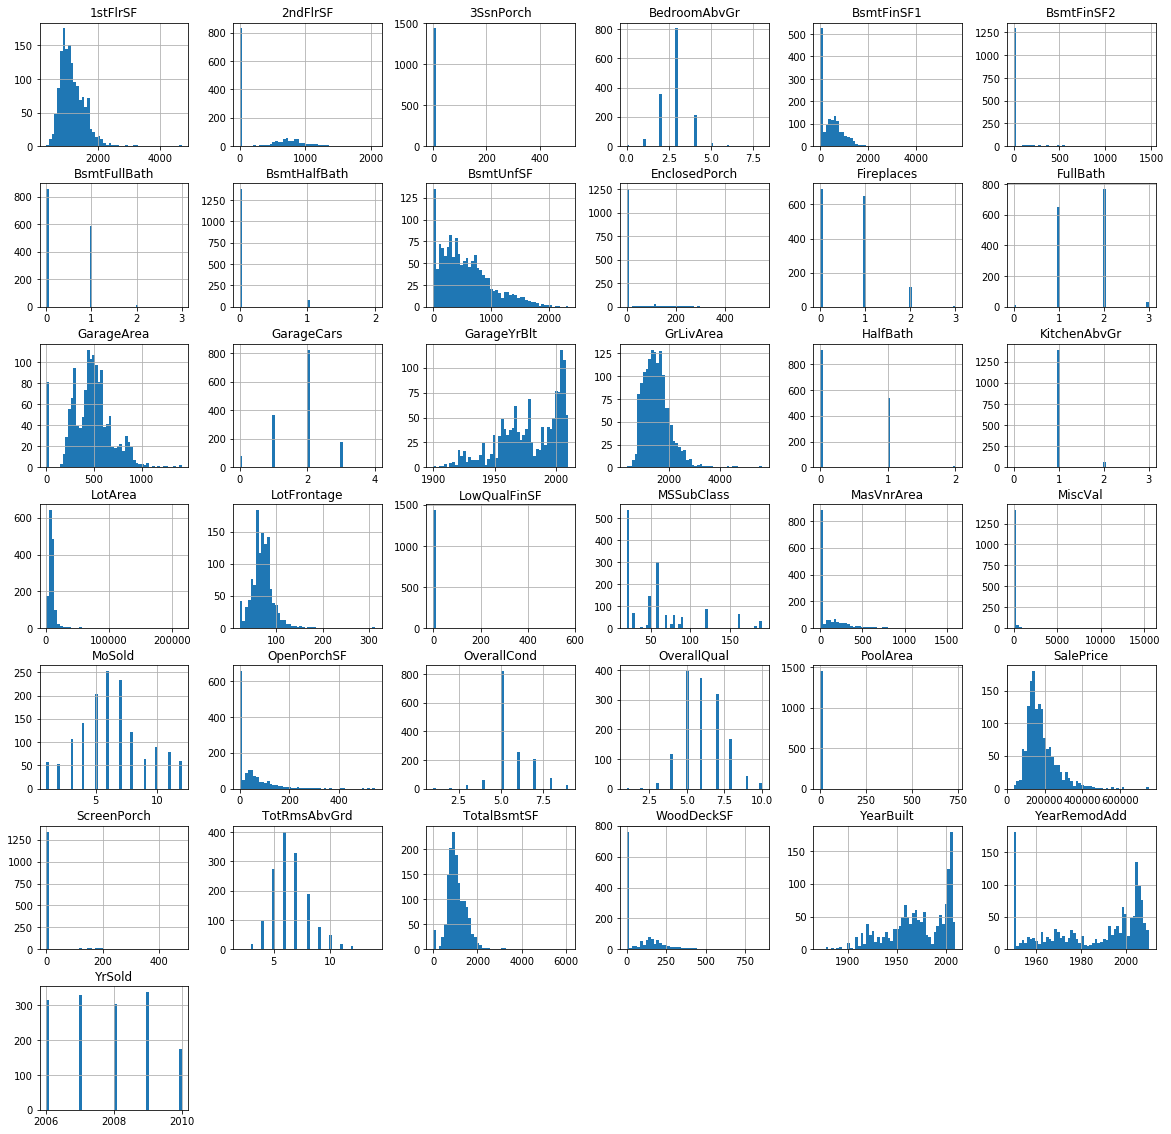

In [5]:
train.hist(bins=50, figsize=(20,20))

In [8]:
y.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [9]:
missingRows = pd.isnull(train).sum(axis=1) > 0
missingCols = pd.isnull(train).sum(axis=0) > 0
print('The columns with missingness are %s' %(train.columns[missingCols]))

The columns with missingness are Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')


In [10]:
missing = ['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature']

for feature in missing:
    print('{} is missing {} values'.format(feature, train[feature].isna().sum()))

LotFrontage is missing 259 values
Alley is missing 1369 values
MasVnrType is missing 8 values
MasVnrArea is missing 8 values
BsmtQual is missing 37 values
BsmtCond is missing 37 values
BsmtExposure is missing 38 values
BsmtFinType1 is missing 37 values
BsmtFinType2 is missing 38 values
Electrical is missing 1 values
FireplaceQu is missing 690 values
GarageType is missing 81 values
GarageYrBlt is missing 81 values
GarageFinish is missing 81 values
GarageQual is missing 81 values
GarageCond is missing 81 values
PoolQC is missing 1453 values
Fence is missing 1179 values
MiscFeature is missing 1406 values


In [11]:
train.SalePrice = pd.qcut(train.SalePrice, [0, 0.25, 0.5, 0.75, 1.], labels = [25, 50, 75, 100]).astype('O')
train.SalePrice.value_counts()

50     367
75     366
25     365
100    362
Name: SalePrice, dtype: int64

In [12]:
train['LotFrontage'] = train['LotFrontage'].fillna(float(-999))
train['Alley'] = train['Alley'].fillna("No Alley Access")
train['MasVnrType'] = train['MasVnrType'].fillna("Missing")
train['MasVnrArea'] = train['MasVnrArea'].fillna(float(-999))
train['BsmtQual'] = train['BsmtQual'].fillna('No Basement')
train['BsmtCond'] = train['BsmtCond'].fillna('No Basement')
train['BsmtExposure'] = train['BsmtExposure'].fillna('No Basement')
train['BsmtFinType1'] = train['BsmtFinType1'].fillna('No Basement')
train['BsmtFinType2'] = train['BsmtFinType2'].fillna('No Basement')
train['FireplaceQu'] = train['FireplaceQu'].fillna('No Fireplace')
train['GarageType'] = train['GarageType'].fillna('No Garage')
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(float(-999))
train['GarageFinish'] = train['GarageFinish'].fillna('No Garage')
train['GarageQual'] = train['GarageQual'].fillna('No Garage')
train['GarageCond'] = train['GarageCond'].fillna('No Garage')
train['PoolQC'] = train['PoolQC'].fillna('No Pool')
train['Fence'] = train['Fence'].fillna('No Fence')
train['MiscFeature'] = train['MiscFeature'].fillna('NoMisc')
train['Electrical'] = train['Electrical'].fillna('Missing')

In [13]:
nominalcols = train.select_dtypes(include = ['O'])
numericcols = train.select_dtypes(include = ['int64', 'float64'])


In [14]:
nominalcols = nominalcols.apply(LabelEncoder().fit_transform)

In [15]:
new_train = nominalcols.merge(numericcols, how = 'outer', left_index = True, right_index = True)

In [16]:
house_data = new_train.loc[:, new_train.columns != 'SalePrice']
house_target = new_train['SalePrice']
house_data

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,3,1,1,3,3,0,4,0,5,2,...,548,0,61,0,0,0,0,0,2,2008
2,3,1,1,3,3,0,2,0,24,1,...,460,298,0,0,0,0,0,0,5,2007
3,3,1,1,0,3,0,4,0,5,2,...,608,0,42,0,0,0,0,0,9,2008
4,3,1,1,0,3,0,0,0,6,2,...,642,0,35,272,0,0,0,0,2,2006
5,3,1,1,0,3,0,2,0,15,2,...,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,3,1,1,3,3,0,4,0,8,2,...,460,0,40,0,0,0,0,0,8,2007
1457,3,1,1,3,3,0,4,0,14,2,...,500,349,0,0,0,0,0,0,2,2010
1458,3,1,1,3,3,0,4,0,6,2,...,252,0,60,0,0,0,0,2500,5,2010


In [17]:
X_train, X_test, y_train, y_test = train_test_split(house_data, house_target, test_size=0.2, random_state=0)

In [18]:
###Random Forest Approach:

In [19]:
np.random.seed(0)
from sklearn import ensemble
randomForest = ensemble.RandomForestClassifier()


In [20]:
randomForest.set_params(random_state=0)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [21]:
grid_para_forest = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 31),
    'n_estimators': range(20, 120, 10)
}

In [22]:
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 3)

grid_search_forest = ms.GridSearchCV(randomForest, grid_para_forest, scoring='accuracy', cv=skf, n_jobs=-1).fit(X_train, y_train)

In [23]:
grid_search_forest.best_params_

{'criterion': 'entropy', 'max_depth': 9, 'n_estimators': 50}

In [24]:
grid_search_forest.best_score_

0.7748285095924581

In [25]:
print("The training error is: %.5f" % (1 - grid_search_forest.best_estimator_.score(X_train, y_train)))
print("The test     error is: %.5f" % (1 - grid_search_forest.best_estimator_.score(X_test, y_test)))

The training error is: 0.01627
The test     error is: 0.21233


In [91]:
from sklearn.metrics import multilabel_confusion_matrix as mcm, classification_report 

mcm(y_test, grid_search_forest.best_estimator_.predict(X_test))

array([[[200,  17],
        [ 11,  64]],

       [[205,  17],
        [ 21,  49]],

       [[195,  14],
        [ 21,  62]],

       [[214,  14],
        [  9,  55]]])

In [92]:
print(classification_report(y_test, grid_search_forest.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82        75
           1       0.74      0.70      0.72        70
           2       0.82      0.75      0.78        83
           3       0.80      0.86      0.83        64

    accuracy                           0.79       292
   macro avg       0.79      0.79      0.79       292
weighted avg       0.79      0.79      0.79       292



In [27]:
feature_importance = list(zip(house_data.columns, grid_search_forest.best_estimator_.feature_importances_))
dtype = [('feature', 'S10'), ('importance', 'float')]
feature_importance = np.array(feature_importance, dtype=dtype)
feature_sort = np.sort(feature_importance, order='importance')[::-1]
[i for (i, j) in feature_sort[0:5]]



[b'GrLivArea', b'OverallQua', b'YearBuilt', b'1stFlrSF', b'GarageArea']

Text(0.5, 1.0, 'Feature importances')

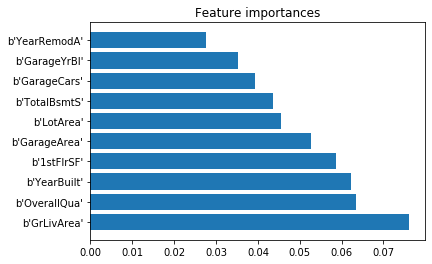

In [28]:
featureNames, featureScores = zip(*list(feature_sort[:10]))

plt.barh(range(len(featureScores)), featureScores, tick_label=featureNames)
plt.title('Feature importances')

In [29]:
###GBM Approach:

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier(random_state = 3)

In [31]:
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 6)

loss = ['deviance', 'exponential']
n_estimators = [100, 150, 200, 250, 300]
max_depth = [2, 3, 5, 10, 15]
min_samples_leaf = [1, 2, 4, 6, 8]
min_samples_split = [2, 4, 6, 10]
max_features = ['auto', 'sqrt', 'log2', None]
hyper_grid = {'loss': loss, 
              'n_estimators': n_estimators, 
              'max_depth': max_depth, 
              'min_samples_leaf': min_samples_leaf, 
              'min_samples_split': min_samples_split, 
              'max_features': max_features}

random_cv = ms.RandomizedSearchCV(estimator = gbm, param_distributions = hyper_grid, 
                                  cv = skf, n_iter = 25, scoring = 'neg_mean_absolute_error', 
                                  n_jobs = -1, random_state = 6).fit(X_train, y_train)

In [32]:
random_cv.best_estimator_

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=10,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=4,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=3, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [33]:
print("The accuracy is: %.5f" % (random_cv.best_estimator_.score(X_train, y_train)))
print("The accuracy  is: %.5f" % (random_cv.best_estimator_.score(X_test, y_test)))

The accuracy is: 1.00000
The accuracy  is: 0.78425


In [34]:
gbm.set_params(learning_rate = 0.1, subsample=0.9, loss = 'deviance', min_samples_leaf = 1, max_features = 'sqrt') 

n_estimators = [95, 100, 105, 110, 115, 120]
max_depth = [14, 15, 16, 17, 18, 19]
min_samples_split = [2, 3, 4, 5, 6]
hyper_grid = {'n_estimators': n_estimators, 
              'max_depth': max_depth,  
              'min_samples_split': min_samples_split, 
              }

random_cv1 = ms.RandomizedSearchCV(gbm, hyper_grid, cv = skf, scoring = 'accuracy', n_jobs = -1, refit = True).fit(X_train, y_train)

In [35]:
random_cv1.best_estimator_

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=18,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=4,
                           min_weight_fraction_leaf=0.0, n_estimators=115,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=3, subsample=0.9, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [36]:
random_cv1.best_score_

0.7534243057848208

In [37]:
print("The accuracy is: %.5f" % (random_cv1.best_estimator_.score(X_train, y_train)))
print("The accuracy  is: %.5f" % (random_cv1.best_estimator_.score(X_test, y_test)))

The accuracy is: 1.00000
The accuracy  is: 0.79110


In [38]:
mcm(y_test, random_cv1.best_estimator_.predict(X_test))

array([[[198,  19],
        [  9,  66]],

       [[207,  15],
        [ 24,  46]],

       [[199,  10],
        [ 24,  59]],

       [[211,  17],
        [  4,  60]]])

In [93]:
print(classification_report(y_test, random_cv1.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.78      0.88      0.82        75
           1       0.75      0.66      0.70        70
           2       0.86      0.71      0.78        83
           3       0.78      0.94      0.85        64

    accuracy                           0.79       292
   macro avg       0.79      0.80      0.79       292
weighted avg       0.79      0.79      0.79       292



In [39]:
feature_importance = list(zip(house_data.columns, random_cv1.best_estimator_.feature_importances_))
dtype = [('feature', 'S10'), ('importance', 'float')]
feature_importance = np.array(feature_importance, dtype=dtype)
feature_sort = np.sort(feature_importance, order='importance')[::-1]
[i for (i, j) in feature_sort[0:5]]

[b'OverallQua', b'GrLivArea', b'1stFlrSF', b'GarageArea', b'TotalBsmtS']

Text(0.5, 1.0, 'Feature importances')

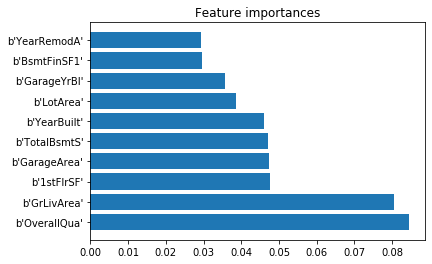

In [40]:
featureNames, featureScores = zip(*list(feature_sort[:10]))

plt.barh(range(len(featureScores)), featureScores, tick_label=featureNames)
plt.title('Feature importances')

In [41]:
###SVM Approach:

In [42]:
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler
svm_model = svm.SVC(kernel = 'poly', degree = 1, gamma = 'auto', random_state = 50)

In [63]:
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X_train)
sX_train = scaler.transform(X_train)
sX_test = scaler.transform(X_test)

In [64]:
grid_para_svm = [
    {'C': [1, 10, 100, 1000],
    'kernel': ['poly'],
    'degree': [1, 2, 3]},
    {'C': [1, 10, 100, 1000],
    'kernel': ['rbf'],
    'gamma': [0.1, 0.01, 0.001, 0.0001]},
]

In [65]:
grid_search_svm = ms.GridSearchCV(svm_model, grid_para_svm, scoring = 'accuracy', cv = skf, n_jobs = -1).fit(sX_train, y_train)

In [66]:
grid_search_svm.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

In [67]:
grid_search_svm.best_score_

0.7774182898646418

In [68]:
print('The training accuracy is %.3f' %(grid_search_svm.best_estimator_.score(sX_train, y_train)))
print('The test accuracy     is %.3f' %(grid_search_svm.best_estimator_.score(sX_test, y_test)))

The training accuracy is 0.858
The test accuracy     is 0.795


In [69]:
mcm(y_test, grid_search_svm.best_estimator_.predict(sX_test))

array([[[203,  14],
        [ 15,  60]],

       [[197,  25],
        [ 20,  50]],

       [[198,  11],
        [ 19,  64]],

       [[218,  10],
        [  6,  58]]])

In [95]:
print(classification_report(y_test, grid_search_svm.best_estimator_.predict(sX_test)))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81        75
           1       0.67      0.71      0.69        70
           2       0.85      0.77      0.81        83
           3       0.85      0.91      0.88        64

    accuracy                           0.79       292
   macro avg       0.80      0.80      0.80       292
weighted avg       0.80      0.79      0.80       292



In [50]:
###PCA Approach

In [70]:
from sklearn.decomposition import PCA
pca = PCA()

In [76]:
pca.set_params(n_components=None)
pca.fit(sX_train)
pca.transform(sX_train)

array([[ 9.12122765e-01, -4.54917253e-01, -4.76462267e-01, ...,
         2.40112368e-03, -1.60312724e-16, -1.42371758e-16],
       [-1.03200904e+00, -4.61946220e-01,  1.22170384e-01, ...,
         5.11998121e-04, -2.22826245e-16, -5.42178999e-17],
       [-8.10103209e-02,  2.75254288e-01,  1.43583757e-01, ...,
        -5.88799140e-03, -4.69208381e-17,  1.05376660e-16],
       ...,
       [-5.90537130e-01, -2.17589421e-01, -4.14861489e-01, ...,
         5.34919896e-04,  2.74685567e-17, -7.16667480e-17],
       [ 7.64145563e-01, -6.00497031e-01, -2.15310602e-01, ...,
         6.46745271e-03,  4.60093116e-17, -1.18549612e-16],
       [ 6.43039753e-01, -4.95714816e-02,  5.42499963e-01, ...,
        -9.09542101e-04,  1.03500261e-16, -2.54327468e-17]])

In [77]:
pca.explained_variance_ratio_

array([1.56949429e-01, 7.81394530e-02, 6.15801631e-02, 4.63774892e-02,
       4.16023928e-02, 3.79283132e-02, 3.35677490e-02, 3.19811931e-02,
       3.14393897e-02, 2.96209667e-02, 2.48093259e-02, 2.22199614e-02,
       2.11686075e-02, 1.98335549e-02, 1.86716216e-02, 1.73985481e-02,
       1.70037309e-02, 1.66253975e-02, 1.60518562e-02, 1.50815067e-02,
       1.45074257e-02, 1.37628326e-02, 1.31735090e-02, 1.25737699e-02,
       1.23147835e-02, 1.12696221e-02, 1.10597461e-02, 1.06524824e-02,
       1.02354585e-02, 9.18893807e-03, 8.74664877e-03, 8.29832720e-03,
       8.05657124e-03, 7.61241806e-03, 7.32464919e-03, 6.93745047e-03,
       6.47527211e-03, 6.24278821e-03, 5.77115112e-03, 5.60443446e-03,
       5.06757449e-03, 4.40447432e-03, 4.34398581e-03, 4.06395461e-03,
       3.98281478e-03, 3.61119241e-03, 3.12920814e-03, 3.02140494e-03,
       2.92605538e-03, 2.84856377e-03, 2.68399977e-03, 2.62727376e-03,
       2.53798755e-03, 2.45198037e-03, 2.27343686e-03, 2.18802150e-03,
      

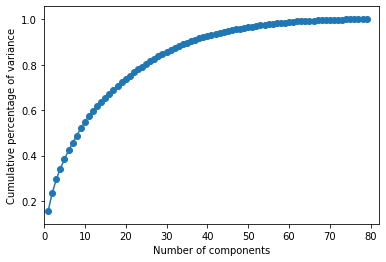

In [78]:
plt.scatter(range(1, 80), np.cumsum(pca.explained_variance_ratio_))
plt.plot(range(1, 80), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative percentage of variance')
plt.xlim(0, 82)
plt.show()

In [81]:
import sklearn.linear_model as lm
logit = lm.LogisticRegression(C=1e5, max_iter = 1500) 
pca.set_params(n_components=50)
pca.fit(sX_train)
sX_train_50 = pca.transform(sX_train)
logit.fit(sX_train_50, y_train)
print("The training error is: %.4f" %(1 - logit.score(sX_train_50, y_train)))

The training error is: 0.1807


In [85]:
sX_test_logit = pca.transform(sX_test)
print("The test error is: %.4f" %(1-logit.score(sX_test_logit[:, :51], y_test)))

The test error is: 0.2192


In [101]:
mcm(y_test, logit.predict(sX_test_logit[:, :51]))

array([[[201,  16],
        [ 12,  63]],

       [[202,  20],
        [ 23,  47]],

       [[196,  13],
        [ 23,  60]],

       [[213,  15],
        [  6,  58]]])

In [103]:
print(classification_report(y_test, logit.predict(sX_test_logit[:, :51])))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82        75
           1       0.70      0.67      0.69        70
           2       0.82      0.72      0.77        83
           3       0.79      0.91      0.85        64

    accuracy                           0.78       292
   macro avg       0.78      0.79      0.78       292
weighted avg       0.78      0.78      0.78       292

